In [1]:
%load_ext autoreload
%autoreload 2

from collections import OrderedDict
import json
import sys
sys.path.append('src')

import numpy as np
from sklearn.cluster import KMeans

from bridge_base_new import Bridge, Support, ZkLoad
#from bridge import Bridge_64, Bridge_160

## 计算

### 输入参数

In [105]:
# 常量
E = 21 * 10**10           # 杨氏模量 (Pa)
P = 1                     # 外力    (kN)
h = 2.52                  # 恒载    (kN)
bottom_chord_length = 10.   # 下弦杆长度/下节点间距 (m)
bridge_len = 160
path = './data/160'

zk_load = ZkLoad(uniform_len=160)
bridge = Bridge(bridge_len)

### 读入数据

In [106]:
# 读入节点数据 => 读入杆件数据 => 读入参数
bridge.load_nodes_data(path)
bridge.load_units_data(path)
bridge.load_params(E=E, 
                   P=P, 
                   h=h, 
                   bottom_chord_length=bottom_chord_length, 
                   load=zk_load)

In [107]:
# 导入截面参数
# 从文件导入
#bridge.load_section_params(path)

# 手动导入 (在检算中使用)
b1, t1, b2, t2 = [0.288, 0.04, 0.052, 0.024]
section_params = [b1, t1, b2, t2]

# 设置截面参数
bridge.set_section_params(bridge.units_nums, section_params)

### 添加支座

In [108]:
# 添加支座
bridge.set_supports([Support(1, h=False, v=True),
                     Support(17, h=True, v=True),
                     Support(32, h=False, v=True)])

### 总体刚度矩阵

In [103]:
K = bridge.K
for i in range(64):
    for j in range(64):
        

(64, 64)

### 单元刚度矩阵

In [130]:
for unit in bridge.units.values():
    print('单元 %d\n%s' % (unit.num, unit.kij))

单元 1
[[ 3.656e+08  3.656e+08 -3.656e+08 -3.656e+08]
 [ 3.656e+08  3.656e+08 -3.656e+08 -3.656e+08]
 [-3.656e+08 -3.656e+08  3.656e+08  3.656e+08]
 [-3.656e+08 -3.656e+08  3.656e+08  3.656e+08]]
单元 2
[[ 1.034e+09  0.000e+00 -1.034e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.034e+09 -0.000e+00  1.034e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
单元 3
[[ 3.878e-24  6.333e-08 -3.878e-24 -6.333e-08]
 [ 6.333e-08  1.034e+09 -6.333e-08 -1.034e+09]
 [-3.878e-24 -6.333e-08  3.878e-24  6.333e-08]
 [-6.333e-08 -1.034e+09  6.333e-08  1.034e+09]]
单元 4
[[ 1.034e+09  0.000e+00 -1.034e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.034e+09 -0.000e+00  1.034e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
单元 5
[[ 3.656e+08 -3.656e+08 -3.656e+08  3.656e+08]
 [-3.656e+08  3.656e+08  3.656e+08 -3.656e+08]
 [-3.656e+08  3.656e+08  3.656e+08 -3.656e+08]
 [ 3.656e+08 -3.656e+08 -3.656e+08  3.656e+08]]
单元 6
[[ 1.034e+09  0.000e+00 -

In [84]:
for unit in bridge.units.values():
    print('单元 %d\n%.3f' % (unit.num, unit.alpha))

单元 1
0.785
单元 2
0.000
单元 3
1.571
单元 4
0.000
单元 5
2.356
单元 6
0.000
单元 7
1.571
单元 8
0.000
单元 9
0.785
单元 10
0.000
单元 11
1.571
单元 12
0.000
单元 13
2.356
单元 14
0.000
单元 15
1.571
单元 16
0.000
单元 17
0.785
单元 18
0.000
单元 19
1.571
单元 20
0.000
单元 21
2.356
单元 22
0.000
单元 23
1.571
单元 24
0.000
单元 25
0.785
单元 26
0.000
单元 27
1.571
单元 28
0.000
单元 29
2.356
单元 30
0.000
单元 31
1.571
单元 32
0.000
单元 33
0.785
单元 34
0.000
单元 35
1.571
单元 36
0.000
单元 37
2.356
单元 38
0.000
单元 39
1.571
单元 40
0.000
单元 41
0.785
单元 42
0.000
单元 43
1.571
单元 44
0.000
单元 45
2.356
单元 46
0.000
单元 47
1.571
单元 48
0.000
单元 49
0.785
单元 50
0.000
单元 51
1.571
单元 52
0.000
单元 53
2.356
单元 54
0.000
单元 55
1.571
单元 56
0.000
单元 57
0.785
单元 58
0.000
单元 59
1.571
单元 60
2.356
单元 61
0.000


In [85]:
for unit in bridge.units.values():
    print('单元 %d\n%.1f' % (unit.num, unit.length))

单元 1
14.1
单元 2
10.0
单元 3
10.0
单元 4
10.0
单元 5
14.1
单元 6
10.0
单元 7
10.0
单元 8
10.0
单元 9
14.1
单元 10
10.0
单元 11
10.0
单元 12
10.0
单元 13
14.1
单元 14
10.0
单元 15
10.0
单元 16
10.0
单元 17
14.1
单元 18
10.0
单元 19
10.0
单元 20
10.0
单元 21
14.1
单元 22
10.0
单元 23
10.0
单元 24
10.0
单元 25
14.1
单元 26
10.0
单元 27
10.0
单元 28
10.0
单元 29
14.1
单元 30
10.0
单元 31
10.0
单元 32
10.0
单元 33
14.1
单元 34
10.0
单元 35
10.0
单元 36
10.0
单元 37
14.1
单元 38
10.0
单元 39
10.0
单元 40
10.0
单元 41
14.1
单元 42
10.0
单元 43
10.0
单元 44
10.0
单元 45
14.1
单元 46
10.0
单元 47
10.0
单元 48
10.0
单元 49
14.1
单元 50
10.0
单元 51
10.0
单元 52
10.0
单元 53
14.1
单元 54
10.0
单元 55
10.0
单元 56
10.0
单元 57
14.1
单元 58
10.0
单元 59
10.0
单元 60
14.1
单元 61
10.0


### 节点竖向位移与影响线

In [111]:
bridge.get_nodes_vdisps()

所有节点竖向位移已计算完毕.


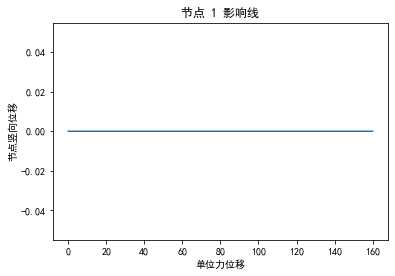

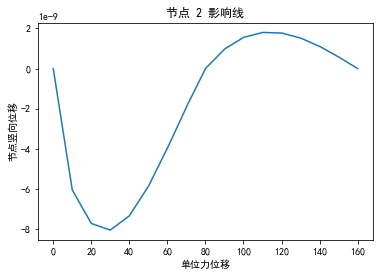

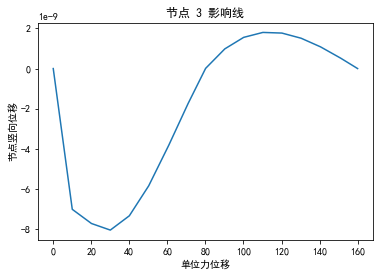

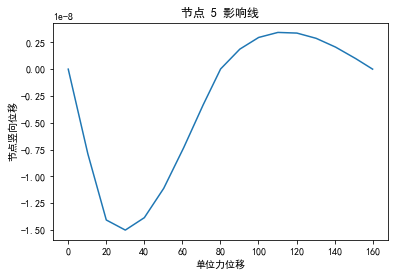

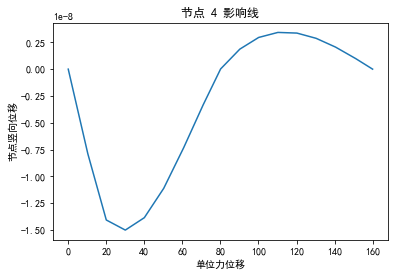

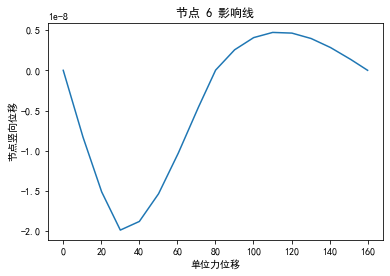

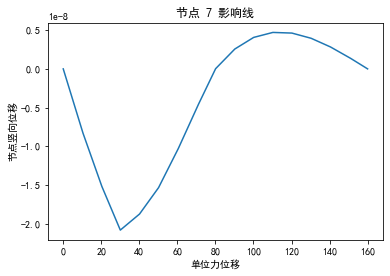

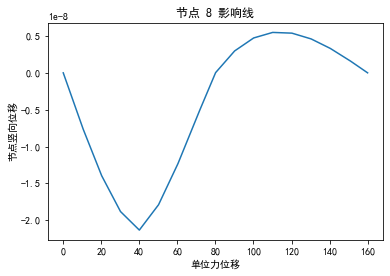

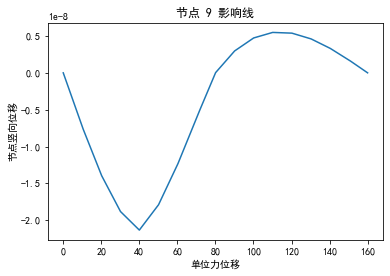

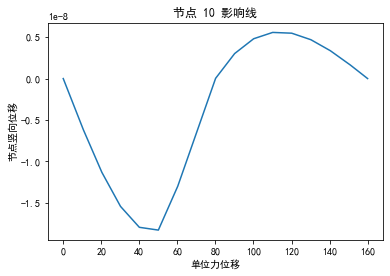

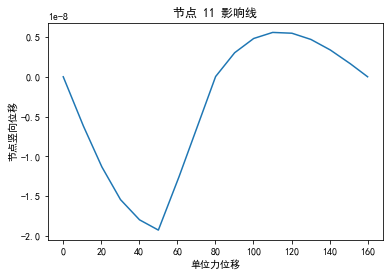

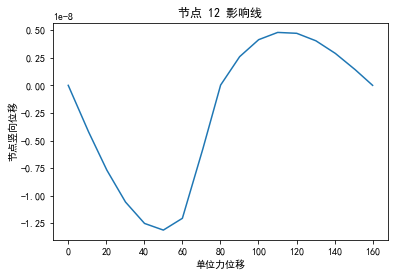

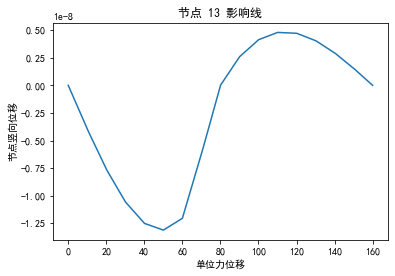

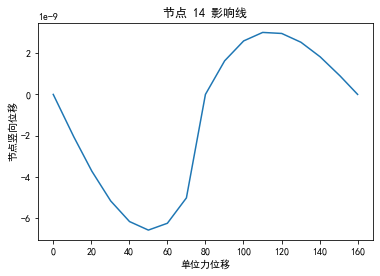

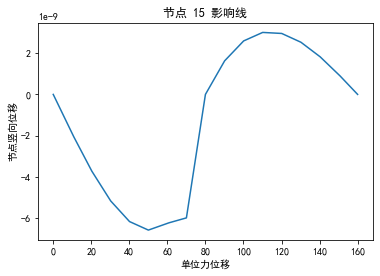

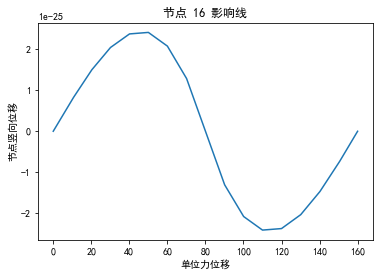

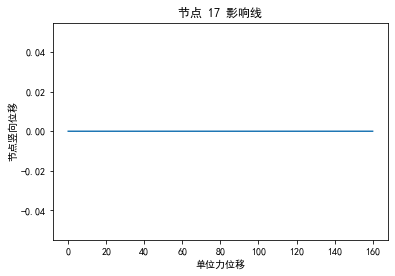

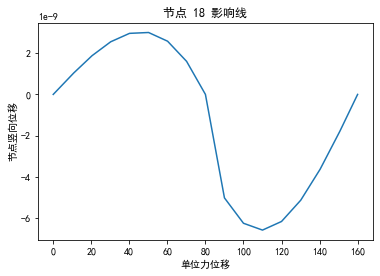

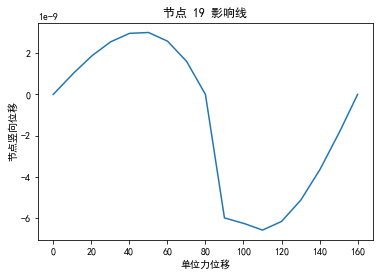

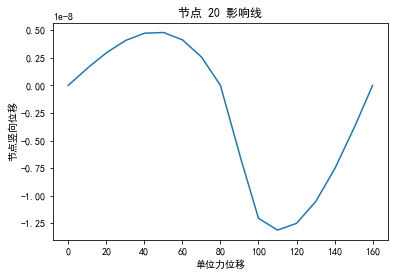

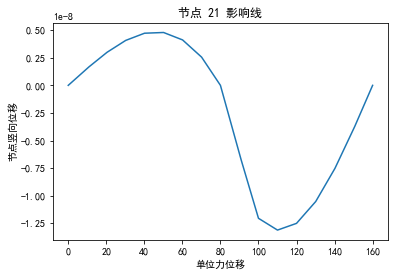

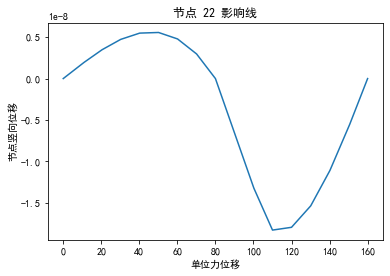

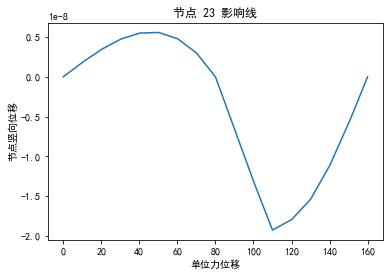

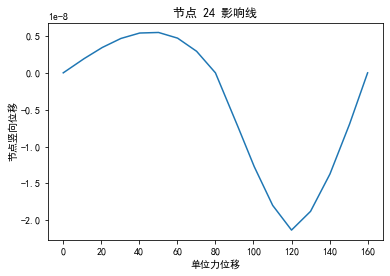

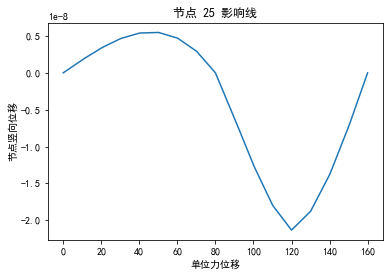

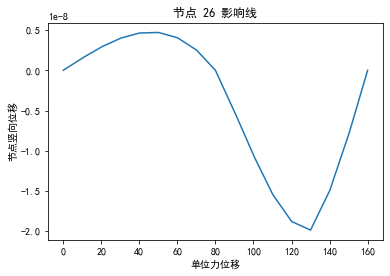

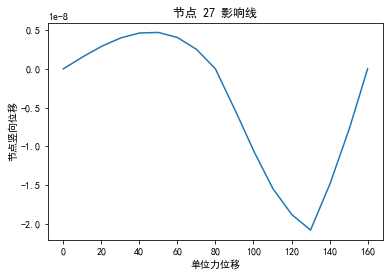

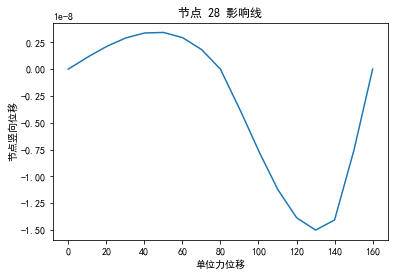

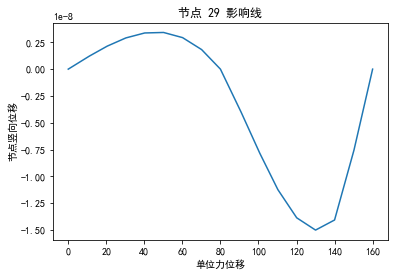

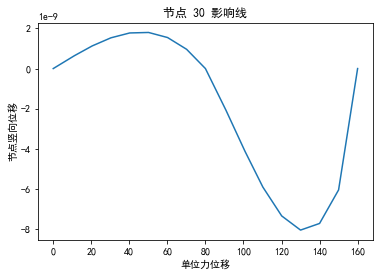

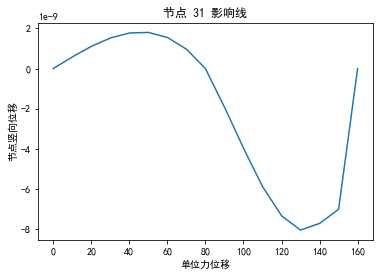

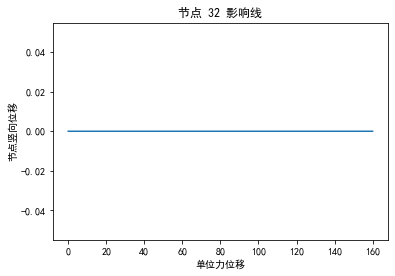

In [112]:
bridge.show_nodes_vdisps()

### 轴力与影响线

In [125]:
bridge.get_units_axial_forces()

所有杆件单元轴力已计算完毕.
所有零杆已标识.


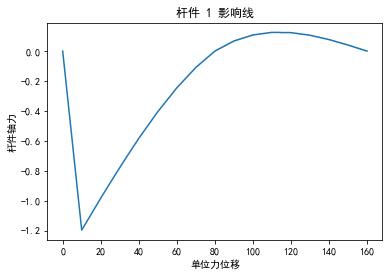

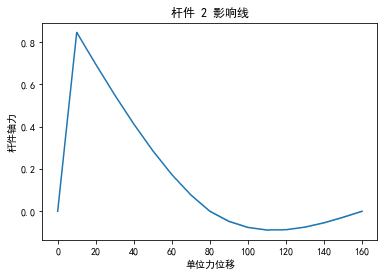

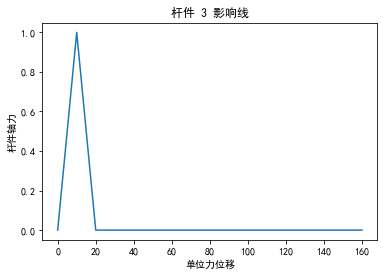

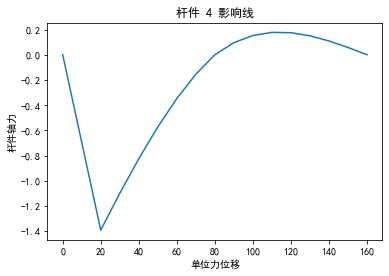

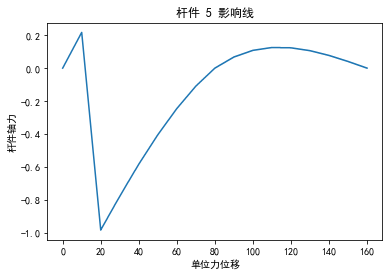

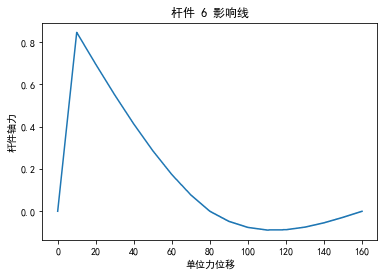

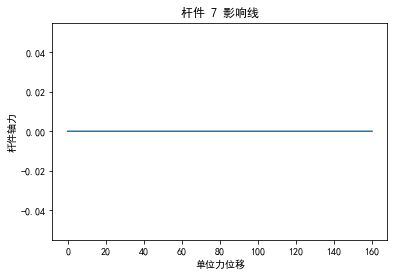

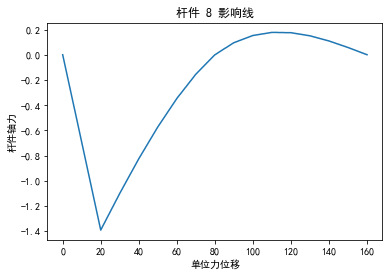

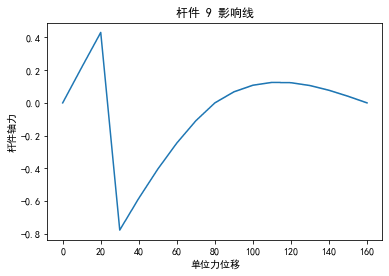

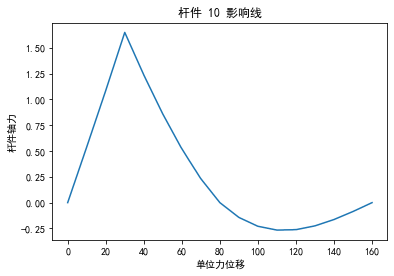

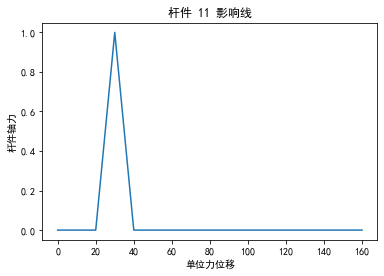

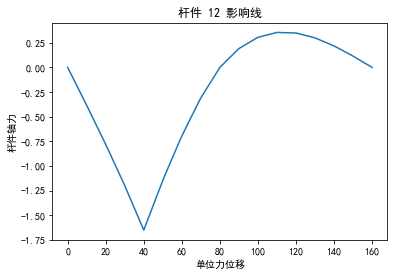

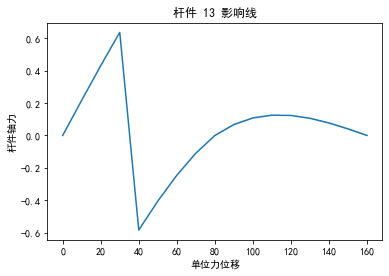

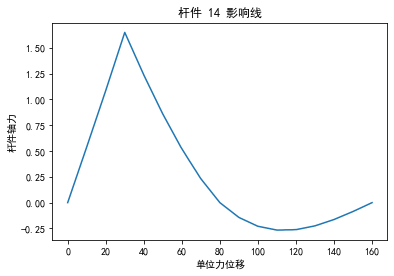

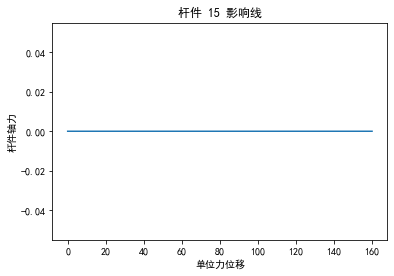

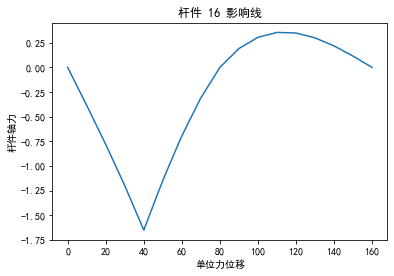

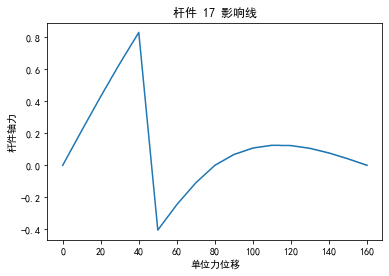

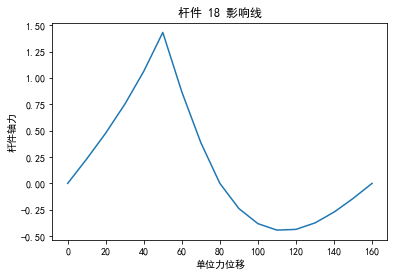

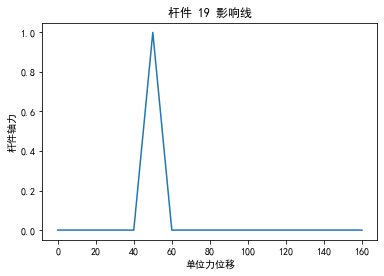

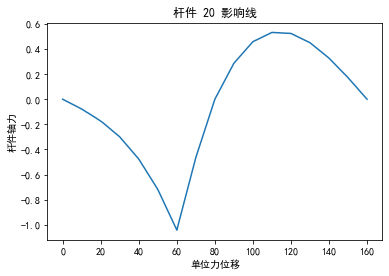

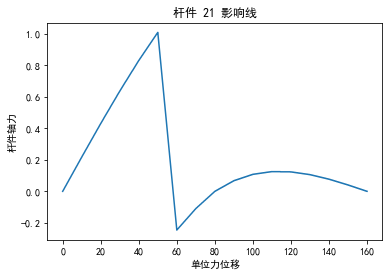

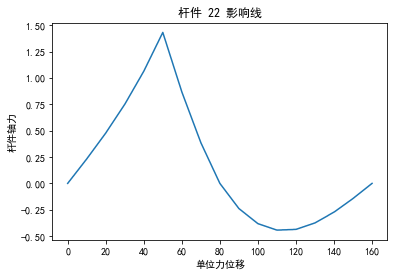

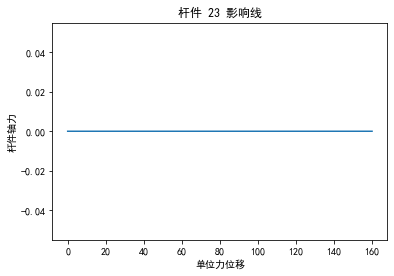

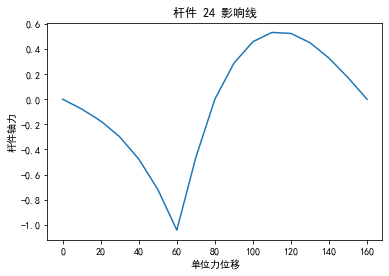

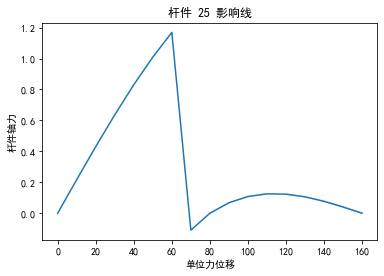

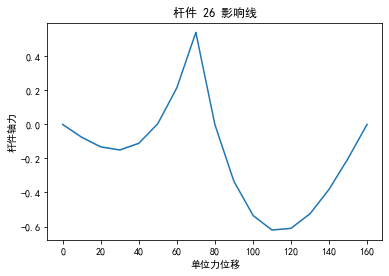

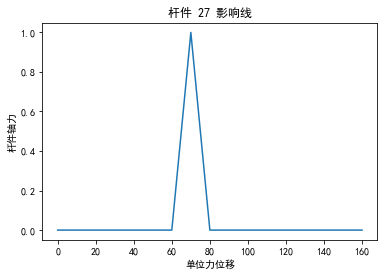

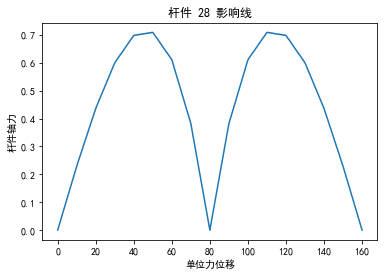

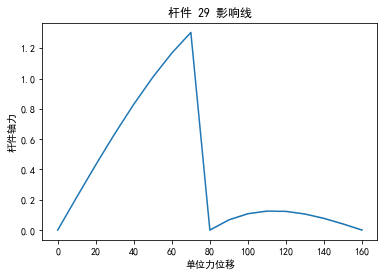

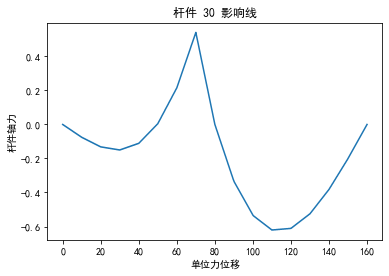

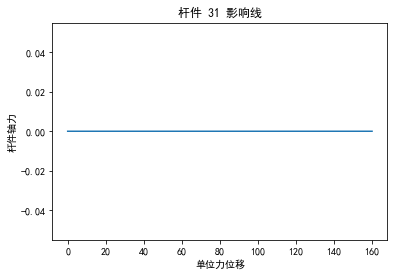

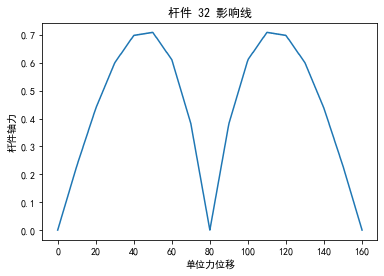

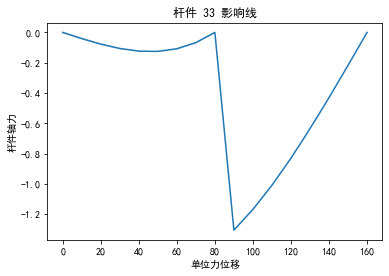

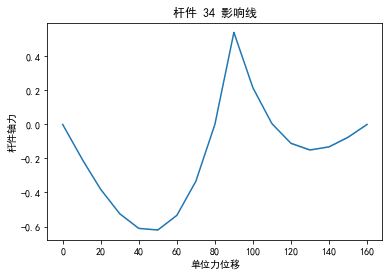

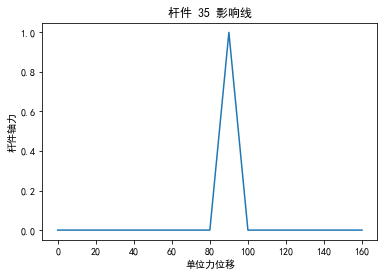

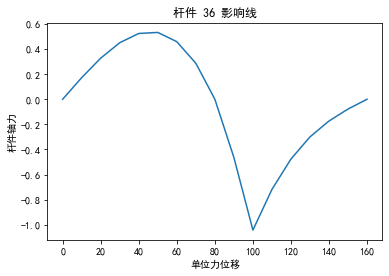

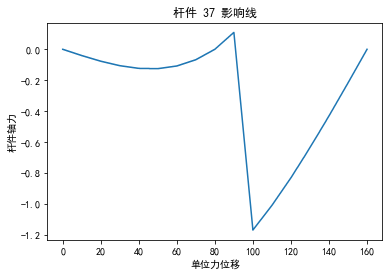

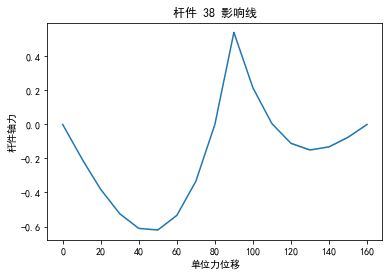

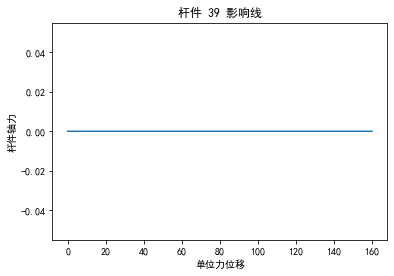

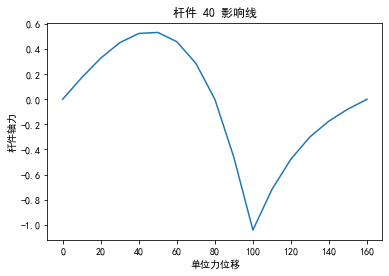

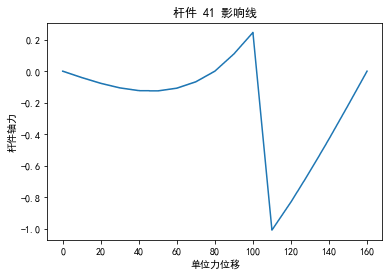

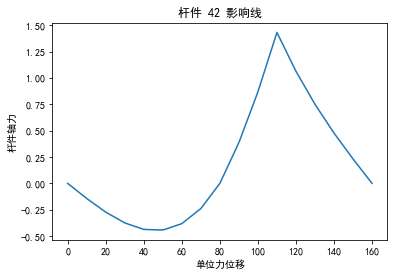

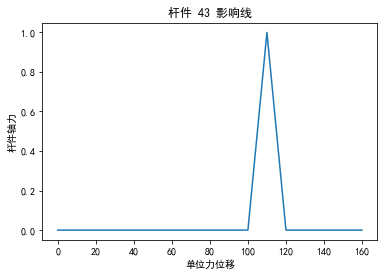

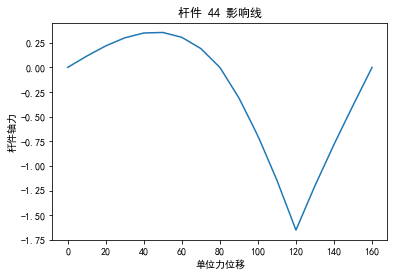

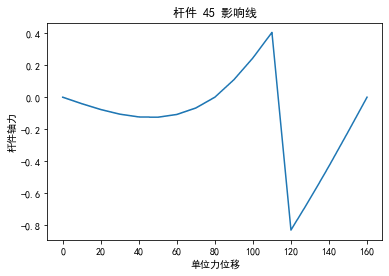

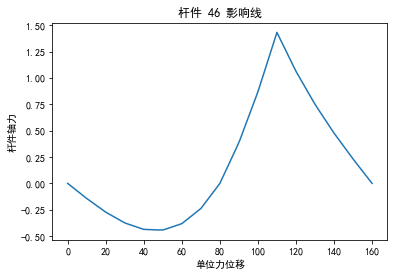

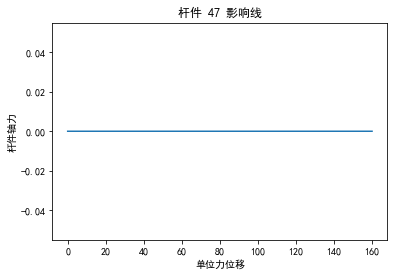

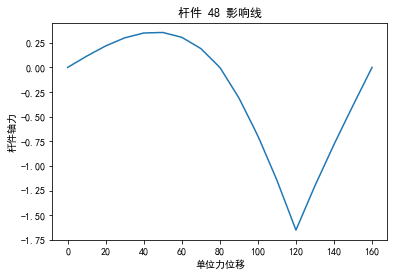

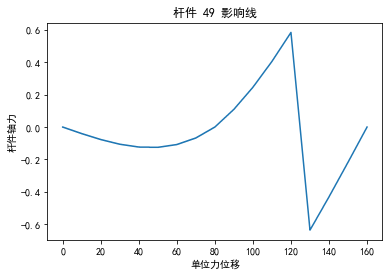

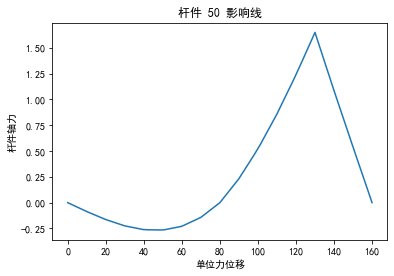

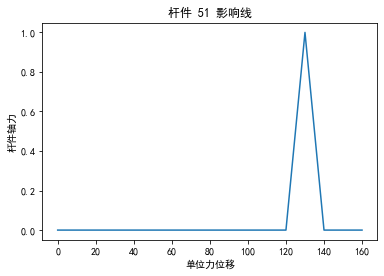

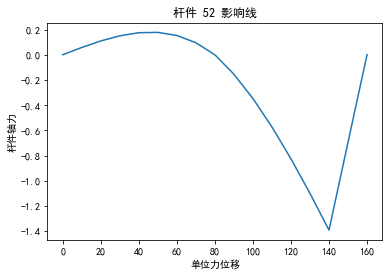

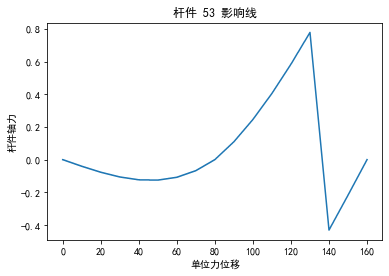

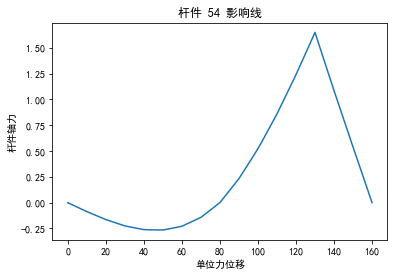

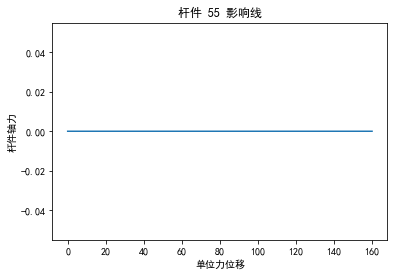

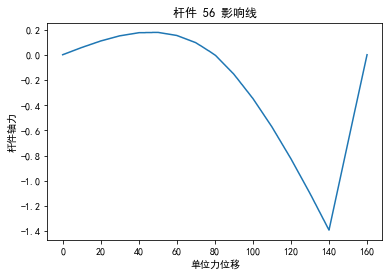

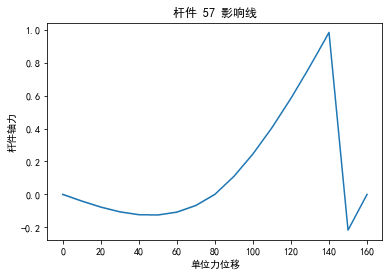

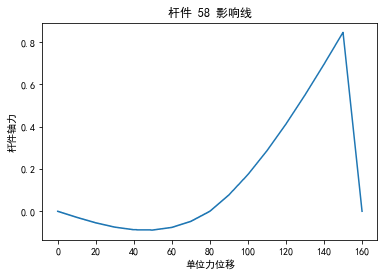

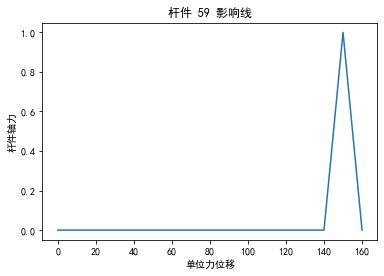

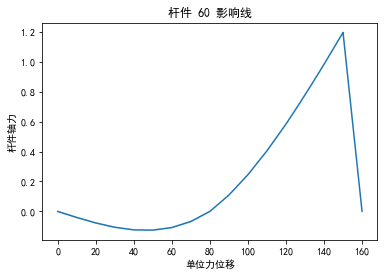

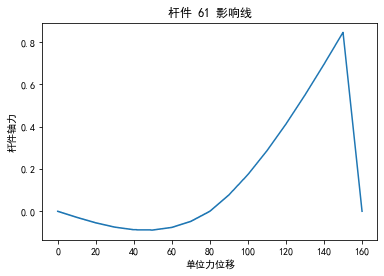

In [126]:
# 轴力影响线
bridge.show_units_axial_forces()

In [127]:
bridge.get_worst_cases_load()

所有杆件单元最不利荷载已计算完毕.


In [81]:
bridge.get_worst_cases_disps()

所有杆件单元最不利位移已计算完毕.


In [66]:
# 竖杆
bridge.vertical_units

[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59]

## 检算

### 初始化截面参数

In [63]:
# 梁截面数据([腹板宽度 翼缘厚度 腹板厚度 翼缘宽度])
#             b2       t1      t2     b1
b1, t1, b2, t2 = [0.288, 0.04, 0.052, 0.024]
section_params = [b1, t1, b2, t2]

# 设置截面参数
bridge.set_section_params(bridge.units_nums, section_params)
#bridge.load_section_params(path)
bridge.update()

所有单元 [毛面积] 已重新计算.
所有单元 [单元刚度矩阵] 已重新计算.
[总体刚度矩阵] 已重新计算.
[缩减刚度矩阵] 已重新计算.
所有节点竖向位移已计算完毕.
所有杆件单元轴力已计算完毕.
所有零杆已标识.
所有杆件单元最不利荷载已计算完毕.
所有杆件单元最不利位移已计算完毕.


### 根据最大内力N聚类

In [128]:
# 前一半节点编号
target_units_nums = list(range(1, 40))

# 根据最大内力N聚类
units_clusters = bridge.get_units_clusters(target_units_nums, n_clusters=7)
units_clusters

OrderedDict([(0, [1, 5, 26, 30, 34, 38]),
             (1, [28, 29, 32]),
             (2, [2, 6, 17, 21]),
             (3, [3, 7, 11, 13, 15, 19, 23, 27, 31, 35, 39]),
             (4, [4, 8, 12, 16, 33, 37]),
             (5, [10, 14, 18, 22, 25]),
             (6, [9, 20, 24, 36])])

In [129]:
for label, units_cluster in units_clusters.items():
    print('类别 %d' % label)
    for unit_num in units_cluster:
        print(unit_num, bridge.units[unit_num].N)
    print()

类别 0
1 [-1195.205 -5643.693]
5 [ -393.548 -3882.148]
26 [ -537.53  -4608.036]
30 [ -537.53  -4608.036]
34 [ -537.53  -4608.036]
38 [ -537.53  -4608.036]

类别 1
28 [9605.214 3563.219]
29 [8408.331 2995.324]
32 [9605.214 3563.219]

类别 2
2 [4085.021  850.625]
6 [4085.021  850.625]
17 [3389.331  272.465]
21 [4955.437 1316.596]

类别 3
3 [1775.159  486.   ]
7 [ 0. -0.]
11 [1775.159  486.   ]
13 [1963.155 -932.486]
15 [ 0. -0.]
19 [1775.159  486.   ]
23 [ 0. -0.]
27 [1775.159  486.   ]
31 [ 0. -0.]
35 [1775.159  486.   ]
39 [ 0. -0.]

类别 4
4 [-1215.24  -6735.492]
8 [-1215.24  -6735.492]
12 [ -486.497 -7798.714]
16 [ -486.497 -7798.714]
33 [-2995.324 -8408.331]
37 [-2219.24  -6637.485]

类别 5
10 [7970.131 1093.863]
14 [7970.131 1093.863]
18 [6246.839 -606.885]
22 [6246.839 -606.885]
25 [6637.485 2219.24 ]

类别 6
9 [  696.988 -2313.712]
20 [ 2186.268 -3337.037]
24 [ 2186.268 -3337.037]
36 [ 2186.268 -3337.037]



In [165]:
'''
clusters == OrderedDict(
    [(0, [10, 14, 18, 22, 26, 30, 33, 36]),
     (1, [38]),
     (2, [3, 7, 11, 15, 19, 23, 27, 31, 35, 39]),
     (3, [12, 16, 20, 24]),
     (4, [2, 5, 6, 13, 17, 25, 28, 32]),
     (5, [37]),
     (6, [1, 4, 8, 9, 21, 29, 34])]
)
'''
# 补充剩余节点编号
units_clusters[0] += [40, 45, 50, 54, 58, 62, 66, 70]
units_clusters[1] += [42]
units_clusters[2] += [43, 47, 51, 55, 59, 63, 67, 71, 75]
units_clusters[3] += [52, 56, 60, 64]
units_clusters[4] += [46, 49, 57, 68, 69, 72, 76]
units_clusters[5] += [41]
units_clusters[6] += [44, 48, 53, 61, 65, 73, 74, 77]

for i, cluster in units_clusters.items():
    print(i, cluster)

0 [12, 13, 14, 15, 16, 18, 40, 45, 50, 54, 58, 62, 66, 70]
1 [28, 29, 30, 31, 32, 33, 34, 42]
2 [2, 3, 5, 43, 47, 51, 55, 59, 63, 67, 71, 75]
3 [17, 19, 21, 39, 52, 56, 60, 64]
4 [1, 20, 22, 23, 24, 25, 26, 27, 37, 46, 49, 57, 68, 69, 72, 76]
5 [4, 6, 7, 8, 9, 10, 11, 41]
6 [35, 36, 38, 44, 48, 53, 61, 65, 73, 74, 77]


### 保存杆件聚类数据

In [ ]:
with open('units_clusters.json', 'w') as units_clusters_file:                                
    json.dump(units_clusters, units_clusters_file)

### 读取杆件聚类数据

In [ ]:
# units_clusters = bridge.load_units_clusters(path)

### 创建检算器

In [ ]:
bridge.check()
checker = Checker(bridge)

### 调节截面参数

In [ ]:
# b = 2 * t1 + b2 = 0.46
# h = 2 * b1 + t2 = 0.76
B = {
    '0':  0.46, 
    '1':  0.46, 
    '2':  0.46, 
    '3':  0.46,
    '4':  0.46, 
    '5':  0.46, 
    '6':  0.46
}

T1 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}


H = {
    '0':  0.60,  
    '1':  0.76,  
    '2':  0.44, 
    '3':  0.44,
    '4':  0.76, 
    '5':  0.60, 
    '6':  0.60 
}


T2 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}

In [ ]:
for label, units_cluster in units_clusters.items():
    # 每一类的参数
    b, t1 = B[label], T1[label]
    b2 = b - 2 * t1
    
    h, t2 = H[label], T2[label]
    b1 = (h - t2) / 2
    
    section_params = [b2, t1, t2, b1]
    bridge.set_section_params(units_cluster, section_params)          

bridge.update()

### 检算所有杆件

In [ ]:
checker.check_all()

### 单独进行某种类型检算

### 测试👇

In [38]:
np.array([1, 2])

array([1, 2])

In [49]:
def a():
    x = 1
    b()
    c()
    print(x)
def b():
    global x
    x += 1
def c():
    global x
    x += 1

In [50]:
a()

NameError: name 'x' is not defined